In [1]:
import yfinance as yf
import datetime as dt
import pandas as pd
import numpy as np
from numpy import arange
import matplotlib.pyplot as plt
from pandas import read_csv
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import RandomizedSearchCV

In [3]:
sp500data = yf.download("^GSPC", start="2017-01-01", end="2022-10-16")
sp500_df = pd.DataFrame(sp500data)
sp500_df.to_csv("sp500_data.csv")

[*********************100%***********************]  1 of 1 completed


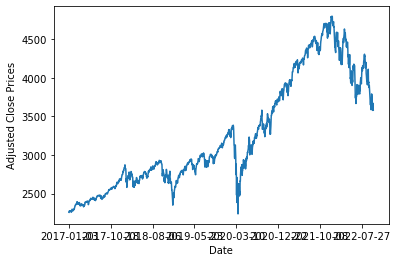

In [4]:
read_df = pd.read_csv("sp500_data.csv")
read_df.set_index("Date", inplace=True)
read_df['Adj Close'].plot()
plt.ylabel("Adjusted Close Prices")
plt.show()

In [62]:
df = pd.read_csv("sp500_data.csv")
df.set_index("Date", inplace=True)
df.dropna(inplace=True)
df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-01-03,2251.570068,2263.879883,2245.129883,2257.830078,2257.830078,3773010000
2017-01-04,2261.600098,2272.820068,2261.600098,2270.750000,2270.750000,3768890000
2017-01-05,2268.179932,2271.500000,2260.449951,2269.000000,2269.000000,3785080000
2017-01-06,2271.139893,2282.100098,2264.060059,2276.979980,2276.979980,3342080000
2017-01-09,2273.590088,2275.489990,2268.899902,2268.899902,2268.899902,3219730000
...,...,...,...,...,...,...
2022-10-10,3647.510010,3652.169922,3588.100098,3612.389893,3612.389893,3834320000
2022-10-11,3595.860107,3640.659912,3568.449951,3588.840088,3588.840088,4759030000
2022-10-12,3590.830078,3608.340088,3573.860107,3577.030029,3577.030029,4006830000


In [63]:
x = df.iloc[:, 0:5].values
y = df.iloc[:, 4].values

In [64]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3,  random_state=0)

In [65]:
scale = StandardScaler()
x_train = scale.fit_transform(x_train)
x_test = scale.transform(x_test)

In [66]:
grid_rf = {
'n_estimators': [20, 50, 100, 500, 1000],  
'max_depth': np.arange(1, 15, 1),  
'min_samples_split': [2, 10, 9], 
'min_samples_leaf': np.arange(1, 15, 2, dtype=int),  
'bootstrap': [True, False], 
'random_state': [1, 2, 30, 42]
}
rscv = RandomizedSearchCV(estimator=model, param_distributions=grid_rf, cv=3, n_jobs=-1, verbose=2, n_iter=200)
rscv_fit = rscv.fit(x_train, y_train)
best_parameters = rscv_fit.best_params_
print(best_parameters)

Fitting 3 folds for each of 200 candidates, totalling 600 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    7.6s
[Parallel(n_jobs=-1)]: Done 162 tasks      | elapsed:   29.9s
[Parallel(n_jobs=-1)]: Done 365 tasks      | elapsed:   55.4s
[Parallel(n_jobs=-1)]: Done 600 out of 600 | elapsed:  1.4min finished


{'random_state': 42, 'n_estimators': 100, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': 11, 'bootstrap': False}


In [68]:
model = RandomForestRegressor(n_estimators=100, random_state=42, min_samples_split=2, min_samples_leaf=1, max_depth=11, bootstrap=False)
model.fit(x_train, y_train)
predict = model.predict(x_test)
print(predict)
print(predict.shape)

[2863.4953125  2579.09010742 2732.41269043 2713.08333333 2429.24332682
 3874.51690186 3550.41613037 2630.46977539 2743.07006836 4519.81783691
 3013.21834961 4401.22741211 2886.51787842 2350.11000488 4223.70019531
 4078.60352539 2656.59699463 2433.00963379 2604.1214624  2870.1619458
 2363.72497559 3237.98591797 3765.01736328 2374.66037109 2584.18366211
 3192.09691162 2997.94995117 4166.33048828 3931.62487305 3915.69911621
 2767.15270508 4369.59082031 4356.85798177 2496.24480713 2846.07006836
 4260.23261719 3961.4619873  4483.87011719 3900.01541504 4421.74990234
 2349.63000488 2656.59699463 3271.76938232 3674.84008789 2783.47000732
 4568.02001953 2891.63989258 2839.25       3113.48999023 4023.88989258
 3131.66243652 2659.80436523 3801.21584961 2802.82555094 2632.47355225
 2863.4953125  2270.75318359 2500.46685547 3524.11637695 2476.59256836
 3530.14599121 2497.47918457 2870.1619458  4600.21519531 2270.8140918
 3669.20798828 3974.35852295 3911.92509521 3072.6998999  2870.06352295
 4444.87

In [69]:
print("Mean Absolute Error:", round(metrics.mean_absolute_error(y_test, predict), 4))
print("Mean Squared Error:", round(metrics.mean_squared_error(y_test, predict), 4))
print("Root Mean Squared Error:", round(np.sqrt(metrics.mean_squared_error(y_test, predict)), 4))
print("(R^2) Score:", round(metrics.r2_score(y_test, predict), 4))
print(f'Train Score : {model.score(x_train, y_train) * 100:.2f}% and Test Score : {model.score(x_test, y_test) * 100:.2f}% using Random Tree Regressor.')
errors = abs(predict - y_test)
mape = 100 * (errors / y_test)
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.') 

Mean Absolute Error: 1.8975
Mean Squared Error: 11.435
Root Mean Squared Error: 3.3816
(R^2) Score: 1.0
Train Score : 100.00% and Test Score : 100.00% using Random Tree Regressor.
Accuracy: 99.94 %.


In [80]:
predictions = pd.DataFrame({"Predictions": predict}, index=pd.date_range(start=df.index[-1], periods=len(predict), freq="D", name="Date"))
predictions.to_csv("Predicted-price-data.csv")
#colllects future days from predicted values
oneyear_df = pd.DataFrame(predictions[:365])
oneyear_df.to_csv("one-year-predictions.csv")
onemonth_df = pd.DataFrame(predictions[:30])
onemonth_df.to_csv("one-month-predictions.csv")
fivedays_df = pd.DataFrame(predictions[:5])
fivedays_df.to_csv("five-days-predictions.csv")

Buy price and date
            Predictions
Date                   
2022-10-27  2350.110005
Sell price and date
            Predictions
Date                   
2022-10-23  4519.817837


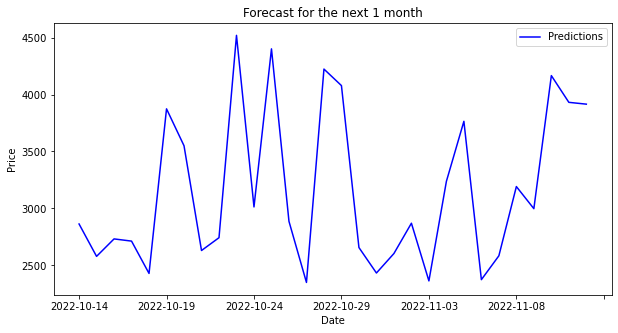

In [83]:
onemonth_df_pred = pd.read_csv("one-month-predictions.csv")
onemonth_df_pred.set_index("Date", inplace=True)
buy_price = min(onemonth_df_pred["Predictions"])
sell_price = max(onemonth_df_pred["Predictions"])
onemonth_buy = onemonth_df_pred.loc[onemonth_df_pred["Predictions"] == buy_price]
onemonth_sell = onemonth_df_pred.loc[onemonth_df_pred["Predictions"] == sell_price]
print("Buy price and date")
print(onemonth_buy)
print("Sell price and date")
print(onemonth_sell)
onemonth_df_pred["Predictions"].plot(figsize=(10, 5), title="Forecast for the next 1 month", color="blue")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.show()

Buy price and date
            Predictions
Date                   
2022-12-09  2270.753184
Sell price and date
            Predictions
Date                   
2023-10-04  4791.148779


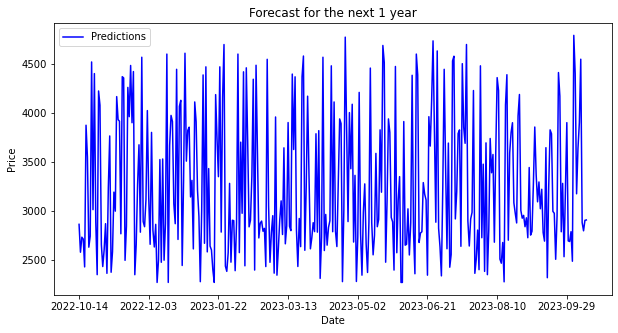

In [84]:
oneyear_df_pred = pd.read_csv("one-year-predictions.csv")
oneyear_df_pred.set_index("Date", inplace=True)
buy_price = min(oneyear_df_pred["Predictions"])
sell_price = max(oneyear_df_pred["Predictions"])
oneyear_buy = oneyear_df_pred.loc[oneyear_df_pred["Predictions"] == buy_price]
oneyear_sell = oneyear_df_pred.loc[oneyear_df_pred["Predictions"] == sell_price]
print("Buy price and date")
print(oneyear_buy)
print("Sell price and date")
print(oneyear_sell)
oneyear_df_pred["Predictions"].plot(figsize=(10, 5), title="Forecast for the next 1 year", color="blue")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.show()